#  Создание и настройка нейронной сети при помощи пакета `torch`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
* https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
* https://saturncloud.io/blog/can-i-use-tensorboard-with-google-colab/

## Задачи для совместного разбора

1\. Используя собственную реализацию нейрона и пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

In [ ]:
class Neuron:
  def __init__(self, n_inputs, req_grad=False):
    self.weights = th.normal(0, 1, (n_inputs, 1), requires_grad=req_grad)
    self.bias = th.normal(0, 1, (1, ), requires_grad=req_grad)

  def forward(self, inputs): # <реализовать логику нейрона>
    return inputs @ self.weights + self.bias

  # def backward(self, inputs, dldy):
  #   self.dw = dldy * inputs
  #   self.db = dldy

In [ ]:
class Loss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()

  # def backward(self, y_pred, y_true): # dL/dy~
  #   self.dpred = 2 * (y_pred - y_true)

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [ ]:
n_epoch = 30
neuron = Neuron(4, req_grad=True)
lr = 0.1
crit = Loss()

for epoch in range(n_epoch):
  # forward pass
  out = neuron.forward(X).flatten()
  loss = crit.forward(out, y)

  # backprop
  loss.backward()
  #gradient descend

  with th.no_grad():
    neuron.weights -= lr * neuron.weights.grad
    neuron.bias -= lr * neuron.bias.grad

  # neuron.weights.data -= lr * neuron.weights.grad
  # neuron.bias.data -= lr * neuron.weights.grad

  # zero grad
  neuron.weights.grad.zero_()
  neuron.bias.grad.zero_()

  print(f'epoch = {epoch}, {loss.item()=}')

epoch = 0, loss.item()=9413.68359375
epoch = 1, loss.item()=6091.322265625
epoch = 2, loss.item()=3961.900634765625
epoch = 3, loss.item()=2590.585693359375
epoch = 4, loss.item()=1703.098876953125
epoch = 5, loss.item()=1125.7833251953125
epoch = 6, loss.item()=748.2532958984375
epoch = 7, loss.item()=500.04144287109375
epoch = 8, loss.item()=335.9635925292969
epoch = 9, loss.item()=226.90975952148438
epoch = 10, loss.item()=154.03453063964844
epoch = 11, loss.item()=105.07544708251953
epoch = 12, loss.item()=72.0119857788086
epoch = 13, loss.item()=49.570377349853516
epoch = 14, loss.item()=34.264137268066406
epoch = 15, loss.item()=23.776103973388672
epoch = 16, loss.item()=16.55792999267578
epoch = 17, loss.item()=11.569662094116211
epoch = 18, loss.item()=8.109027862548828
epoch = 19, loss.item()=5.699565887451172
epoch = 20, loss.item()=4.016361236572266
epoch = 21, loss.item()=2.8368918895721436
epoch = 22, loss.item()=2.0080738067626953
epoch = 23, loss.item()=1.424157142639160

2\. Используя реализацию нейрона из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim`.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
n_epoch = 30
neuron = nn.Linear(in_features=4, out_features=1)
lr = 0.1
crit = nn.MSELoss()
optimizer = optim.SGD(neuron.parameters(), lr=lr)

for epoch in range(n_epoch):
  # forward pass
  out = neuron(X).flatten()
  loss = crit(out, y)

  # backprop
  loss.backward()

  #gradient descend
  optimizer.step()

  # zero grad
  optimizer.zero_grad()

  print(f'epoch = {epoch}, {loss.item()=}')

epoch = 0, loss.item()=9573.08203125
epoch = 1, loss.item()=6191.1142578125
epoch = 2, loss.item()=4024.900390625
epoch = 3, loss.item()=2630.71630859375
epoch = 4, loss.item()=1728.9033203125
epoch = 5, loss.item()=1142.5379638671875
epoch = 6, loss.item()=759.238037109375
epoch = 7, loss.item()=507.31292724609375
epoch = 8, loss.item()=340.8217468261719
epoch = 9, loss.item()=230.18406677246094
epoch = 10, loss.item()=156.25936889648438
epoch = 11, loss.item()=106.59831237792969
epoch = 12, loss.item()=73.06132507324219
epoch = 13, loss.item()=50.297611236572266
epoch = 14, loss.item()=34.77077102661133
epoch = 15, loss.item()=24.13058090209961
epoch = 16, loss.item()=16.806928634643555
epoch = 17, loss.item()=11.745070457458496
epoch = 18, loss.item()=8.232925415039062
epoch = 19, loss.item()=5.787257671356201
epoch = 20, loss.item()=4.078554630279541
epoch = 21, loss.item()=2.8810596466064453
epoch = 22, loss.item()=2.0394816398620605
epoch = 23, loss.item()=1.4465099573135376
epoc

3\. Добавьте визуализацию изменения значения функции потерь во время обучения, используя `tensorboard`.

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

## Задачи для самостоятельного решения

In [1]:
import torch as th
import torch.nn as nn
import torch.optim as optim

<p class="task" id="1"></p>

1\. Используя собственную реализацию полносвязного слоя и мини-пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch as th

X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [ ]:
class Linear:
    def __init__(self, n_neurons, n_features, rg=False):
        self.weights = th.normal(0, 1, (n_features, n_neurons), requires_grad=rg)
        self.bias = th.normal(0, 1, size=(1, n_features), requires_grad=rg)

    def forward(self, inputs):
        return inputs @ self.weights + self.bias


class Loss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()


class ReLU:
  def forward(self, y_pred):
    return th.clip(y_pred, 0)

In [ ]:
fc1 = Linear(n_neurons=10, n_features=1, rg=True)
relu = ReLU()
fc2 = Linear(n_neurons=1, n_features=10, rg=True)
lr = 0.1
crit = Loss()

In [ ]:
epochs = 30
for epoch in range(epochs):
  # forward pass
  out = fc1.forward(X)
  out = relu.forward(out)
  out = fc2.forward(out)
  loss = crit.forward(out, y)

  # backprop
  loss.backward()

  #gradient descend
  with th.no_grad():
    fc1.weights -= lr * fc1.weights.grad
    fc1.bias -= lr * fc1.bias.grad
    fc2.weights -= lr * fc2.weights.grad
    fc2.bias -= lr * fc2.bias.grad

  # zero grad
  fc1.weights.grad.zero_()
  fc1.bias.grad.zero_()
  fc2.weights.grad.zero_()
  fc2.bias.grad.zero_()
  print(f'epoch = {epoch}, {loss.item()=}')

epoch = 0, loss.item()=0.6088546514511108
epoch = 1, loss.item()=0.5818596482276917
epoch = 2, loss.item()=0.5621654987335205
epoch = 3, loss.item()=0.5457549691200256
epoch = 4, loss.item()=0.5310277342796326
epoch = 5, loss.item()=0.5173566937446594
epoch = 6, loss.item()=0.5044448375701904
epoch = 7, loss.item()=0.4921405613422394
epoch = 8, loss.item()=0.48036080598831177
epoch = 9, loss.item()=0.469070702791214
epoch = 10, loss.item()=0.4582532048225403
epoch = 11, loss.item()=0.4478570520877838
epoch = 12, loss.item()=0.43785741925239563
epoch = 13, loss.item()=0.4282357394695282
epoch = 14, loss.item()=0.4189762473106384
epoch = 15, loss.item()=0.4100640118122101
epoch = 16, loss.item()=0.4014878571033478
epoch = 17, loss.item()=0.39324063062667847
epoch = 18, loss.item()=0.3853304386138916
epoch = 19, loss.item()=0.3777145743370056
epoch = 20, loss.item()=0.3703811764717102
epoch = 21, loss.item()=0.36331963539123535
epoch = 22, loss.item()=0.35652169585227966
epoch = 23, loss.

<p class="task" id="2"></p>

2\. Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели опишите класс `Net`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class Net:
  def __init__(self, in_feat, out_feat, lr):
    self.fc1 = nn.Linear(in_feat, out_feat)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(out_feat, 1)
    self.crit = nn.MSELoss()
    self.optimizer1 = optim.SGD(self.fc1.parameters(), lr=lr)
    self.optimizer2 = optim.SGD(self.fc2.parameters(), lr=lr)

  def forward(self, X, y):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.fc2(out)
    self.loss = self.crit(out, y)
    return out

  def backward(self):
    self.loss.backward()

  def optimize(self):
    self.optimizer1.step()
    self.optimizer2.step()
    self.optimizer1.zero_grad()
    self.optimizer2.zero_grad()

In [ ]:
n_epoch = 30
net = Net(in_feat=1, out_feat=10, lr=0.1)
batches = th.linspace(0, X.shape[0], steps=5).long()

for epoch in range(n_epoch):
  loss_value = 0
  for b in range(1, len(batches)):
    x_batch = X[batches[b-1]:batches[b]]
    y_batch = y[batches[b-1]:batches[b]]
    # forward pass
    out = net.forward(x_batch, y_batch)

    # backprop
    net.backward()

    #gradient descend
    net.optimize()

    if loss.item() >= 0:
      loss_value += net.loss.item() / (batches[b] - batches[b-1]).item()

  print(f'{epoch=}, {loss_value=}')

epoch=0, loss_value=0.10895120084285737
epoch=1, loss_value=0.09874391317367555
epoch=2, loss_value=0.08446604371070862
epoch=3, loss_value=0.07350066542625427
epoch=4, loss_value=0.06508172988891602
epoch=5, loss_value=0.05857522487640381
epoch=6, loss_value=0.05351947546005249
epoch=7, loss_value=0.049586727023124694
epoch=8, loss_value=0.04674420833587646
epoch=9, loss_value=0.04468712687492371
epoch=10, loss_value=0.043301905393600466
epoch=11, loss_value=0.042646327018737794
epoch=12, loss_value=0.04241408944129944
epoch=13, loss_value=0.042463256418704985
epoch=14, loss_value=0.042695215344429015
epoch=15, loss_value=0.04299961805343628
epoch=16, loss_value=0.04330545842647553
epoch=17, loss_value=0.043577134013175964
epoch=18, loss_value=0.043799367547035215
epoch=19, loss_value=0.04393035978078842
epoch=20, loss_value=0.04403583526611328
epoch=21, loss_value=0.044069198966026304
epoch=22, loss_value=0.04401564180850982
epoch=23, loss_value=0.0439900666475296
epoch=24, loss_valu

<p class="task" id="3"></p>

3\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
batches = th.linspace(0, X.shape[0], steps=5).long()
(batches[2] - batches[1]).item()

25

In [ ]:
n_inputs = 1
n_hidden = 10
n_out = 1
lr = 0.1
n_epochs = 30

net = nn.Sequential(
    nn.Linear(n_inputs, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_out)
)
crit = nn.MSELoss()

batches = th.linspace(0, X.shape[0], steps=5).long()
optimizer = optim.SGD(net.parameters(), lr=lr)
for epoch in range(n_epochs):
  loss_value = 0
  for b in range(len(batches)):
    x_batch = X[batches[b-1]:batches[b]]
    y_batch = y[batches[b-1]:batches[b]]
    out = net(x_batch)
    loss = crit(out, y_batch)

    # backprop
    loss.backward()

    #gradient descend
    optimizer.step()

    # zero grad
    optimizer.zero_grad()

    if loss.item() >= 0:
      loss_value += loss.item() / (batches[b] - batches[b-1]).item()
  print(f'{epoch=}, loss={loss_value}')

epoch=0, loss=0.10152087211608887
epoch=1, loss=0.12000419437885283
epoch=2, loss=0.1021242254972458
epoch=3, loss=0.0870594334602356
epoch=4, loss=0.07607410550117492
epoch=5, loss=0.06799804210662841
epoch=6, loss=0.061678999066352845
epoch=7, loss=0.05667942762374878
epoch=8, loss=0.05287187695503235
epoch=9, loss=0.049901809692382816
epoch=10, loss=0.04758579552173615
epoch=11, loss=0.045814166069030764
epoch=12, loss=0.04448946237564087
epoch=13, loss=0.043435702323913576
epoch=14, loss=0.04262644112110138
epoch=15, loss=0.04192880392074585
epoch=16, loss=0.0413538384437561
epoch=17, loss=0.04088403403759003
epoch=18, loss=0.040480048656463624
epoch=19, loss=0.040050543546676635
epoch=20, loss=0.03970788717269898
epoch=21, loss=0.03937158226966858
epoch=22, loss=0.03899832844734192
epoch=23, loss=0.038693578243255616
epoch=24, loss=0.038388250470161436
epoch=25, loss=0.038163898587226866
epoch=26, loss=0.03788849651813507
epoch=27, loss=0.03759589612483978
epoch=28, loss=0.0373660

<p class="task" id="4"></p>

4\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу классификации. В качестве функции потерь используйте реализацию `CrossEntropyLoss` из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`.

Создайте и настройте две модели.

Модель 1:
1. Полносвязный слой с 10 нейронами;
3. Полносвязный слой с 2 нейронами.

Модель 2:
1. Полносвязный слой с 10 нейронами;
2. Функция активации ReLU;
3. Полносвязный слой с 2 нейронами.

Для каждой модели выведите отчет по классификации и визуализацию результатов, где точки раскрашены в цвет наиболее вероятного класса.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [ ]:
n_inputs = X.shape[1]
n_hidden = 10
n_out = 2
lr = 0.1

net_clf1 = nn.Sequential(
    nn.Linear(n_inputs, n_hidden),
    nn.Linear(n_hidden, n_out)
)
net_clf2 = nn.Sequential(
    nn.Linear(n_inputs, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_out)
)
crit = nn.CrossEntropyLoss()

optimizer1 = optim.SGD(net_clf1.parameters(), lr=lr)
optimizer2 = optim.SGD(net_clf2.parameters(), lr=lr)

num_epochs = 100
batch_size = 32

for epoch in range(1, num_epochs + 1):
  shuffled_indices = th.randperm(X.shape[0])
  for batch_start in range(0, X.shape[0], batch_size):
    batch_indices = shuffled_indices[batch_start:batch_start + batch_size]
    batch_X, batch_y = X[batch_indices], y[batch_indices]

    out1 = net_clf1(batch_X)
    out2 = net_clf2(batch_X)

    loss1 = crit(out1, batch_y)
    loss2 = crit(out2, batch_y)

    optimizer1.zero_grad()
    optimizer2.zero_grad()

    loss1.backward()
    loss2.backward()

    optimizer1.step()
    optimizer2.step()

  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Loss1: {loss1.item()}, Loss2: {loss2.item()}')

Epoch: 10, Loss1: 0.6891552805900574, Loss2: 0.6454838514328003
Epoch: 20, Loss1: 0.693291425704956, Loss2: 0.6305063962936401
Epoch: 30, Loss1: 0.7100472450256348, Loss2: 0.5200768709182739
Epoch: 40, Loss1: 0.6970342993736267, Loss2: 0.3300270438194275
Epoch: 50, Loss1: 0.7019215822219849, Loss2: 0.4227900207042694
Epoch: 60, Loss1: 0.6960813403129578, Loss2: 0.34550967812538147
Epoch: 70, Loss1: 0.6843476295471191, Loss2: 0.3210785984992981
Epoch: 80, Loss1: 0.6992026567459106, Loss2: 0.12949487566947937
Epoch: 90, Loss1: 0.7047945857048035, Loss2: 0.12153327465057373
Epoch: 100, Loss1: 0.6857674717903137, Loss2: 0.06744112074375153


In [ ]:
results1 = th.argmax(net_clf1(X), dim=1)
results2 = th.argmax(net_clf2(X), dim=1)

print(f'model 1\n{classification_report(y, results1.numpy())}')
print(f'model 2\n{classification_report(y, results2.numpy())}')

model 1
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000

model 2
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


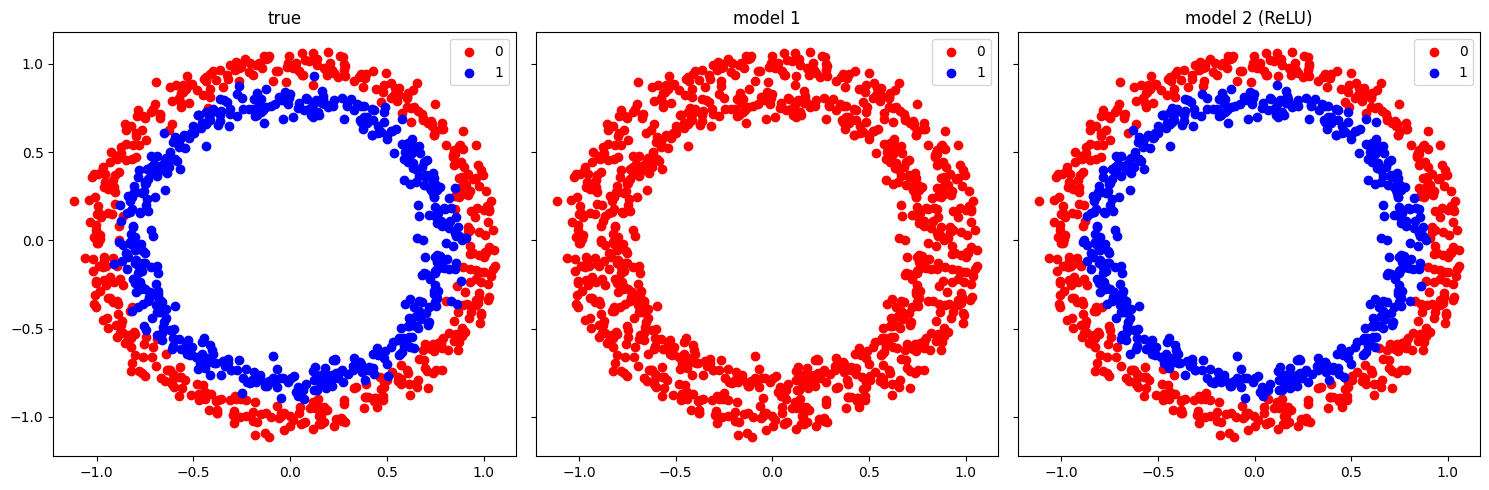

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
for i, res in enumerate([y, results1, results2]):
  cat = th.cat([X, res.reshape(-1, 1)], dim=-1)
  mask_0 = th.where(cat[:, 2] == 0, True, False)
  mask_1 = th.where(cat[:, 2] == 1, True, False)
  axes[i].scatter(cat[mask_0][:, 0], cat[mask_0][:, 1], color='red', label='0')
  axes[i].scatter(cat[mask_1][:, 0], cat[mask_1][:, 1], color='blue', label='1')
  axes[i].legend()

axes[0].set_title('true')
axes[1].set_title('model 1')
axes[2].set_title('model 2 (ReLU)')
plt.tight_layout();

<p class="task" id="5"></p>

5\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде.

- [ ] Проверено на семинаре

In [ ]:
th.cuda.is_available()

True

In [ ]:
from sklearn.datasets import make_regression
import torch as th
import torch.nn as nn
import torch.optim as optim

X, y, coef = make_regression(
    n_samples=10000,
    n_features=10,
    n_informative=6,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
def test():
  global X
  global y
  n_inputs = X.shape[1]
  n_hidden = 32
  n_out = 1
  lr = 0.001
  if th.cuda.is_available():
    DEVICE = 'cuda'
  else:
    DEVICE = 'cpu'

  net_reg = nn.Sequential(
      nn.Linear(n_inputs, n_hidden, device=DEVICE),
      nn.ReLU(),
      nn.Linear(n_hidden, n_out, device=DEVICE)
  )
  crit = nn.MSELoss()

  optimizer = optim.SGD(net_reg.parameters(), lr=lr)

  num_epochs = 100
  batch_size = 64

  X = X.to(device=DEVICE)
  y = y.to(device=DEVICE)
  for epoch in range(1, num_epochs + 1):
    shuffled_indices = th.randperm(X.shape[0])
    for batch_start in range(0, X.shape[0], batch_size):
      batch_indices = shuffled_indices[batch_start:batch_start + batch_size]
      batch_X, batch_y = X[batch_indices], y[batch_indices]

      out = net_reg(batch_X)
      loss = crit(out, batch_y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    if epoch % 10 == 0:
      print(f'Epoch: {epoch}, Loss: {loss.item()}')

In [ ]:
%%time
test() # на GPU

Epoch: 10, Loss: 0.20219603180885315
Epoch: 20, Loss: 0.17300593852996826
Epoch: 30, Loss: 0.1250537931919098
Epoch: 40, Loss: 0.022312205284833908
Epoch: 50, Loss: 0.03133188188076019
Epoch: 60, Loss: 0.06480972468852997
Epoch: 70, Loss: 0.021020662039518356
Epoch: 80, Loss: 0.012843916192650795
Epoch: 90, Loss: 0.058220744132995605
Epoch: 100, Loss: 0.026710301637649536
CPU times: user 13.1 s, sys: 446 ms, total: 13.5 s
Wall time: 14.1 s


In [ ]:
%%time
test() # на CPU

Epoch: 10, Loss: 0.1523120105266571
Epoch: 20, Loss: 0.27221038937568665
Epoch: 30, Loss: 0.09015658497810364
Epoch: 40, Loss: 0.058827999979257584
Epoch: 50, Loss: 0.021765828132629395
Epoch: 60, Loss: 0.0316641703248024
Epoch: 70, Loss: 0.15544430911540985
Epoch: 80, Loss: 0.01183318067342043
Epoch: 90, Loss: 0.027834661304950714
Epoch: 100, Loss: 0.01421114057302475
CPU times: user 8.82 s, sys: 31.4 ms, total: 8.85 s
Wall time: 10 s


<p class="task" id="6"></p>

6\. Используя `torch`, решите задачу классификации. Разделите данные на обучающую и валидационную выборку.  Для настройки весов реализуйте мини-пакетный градиентный спуск на основе данных обучающих выборки.

Используйте `tensorboard` для отслеживания процесса обучения модели. Для каждой эпохи оцените и сохраните среднее значение функции потерь по батчам (для обучающей выборки) и значение функции потерь для валидационной выборки. Визуализируйте граф вычислений модели. Добавьте визуализацию матрицы несоответствий (данную визуализацию можно сохранять не каждую эпоху, а с некоторой частотой) на валидационной выборке. Продемонстрируйте скриншоты интерфейса tensorboard с визуализациями.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

## Обратная связь
- [x] Хочу получить обратную связь по решению